<a href="https://colab.research.google.com/github/Emily-KD/DS200/blob/main/Lab12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade datascience

     |████████████████████████████████| 721 kB 18.6 MB/s 
     |████████████████████████████████| 95 kB 2.7 MB/s 
  Created wheel for datascience: filename=datascience-0.17.0-py3-none-any.whl size=726848 sha256=6581a46eb29ee5435a315ebc4e51cb4dc76485c003c6ebf2a0f4510f6c3fdfd5
  Stored in directory: /root/.cache/pip/wheels/41/e0/1b/bc890a517ad4212eb7180ccca6497c97d0ca7c28342b236888
Successfully built datascience
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
  Attempting uninstall: datascience
    Found existing installation: datascience 0.10.6
    Uninstalling datascience-0.10.6:
      Successfully uninstalled datascience-0.10.6


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
path_data = 'http://personal.psu.edu/drh20/200DS/assets/data/'
from urllib.request import urlopen

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


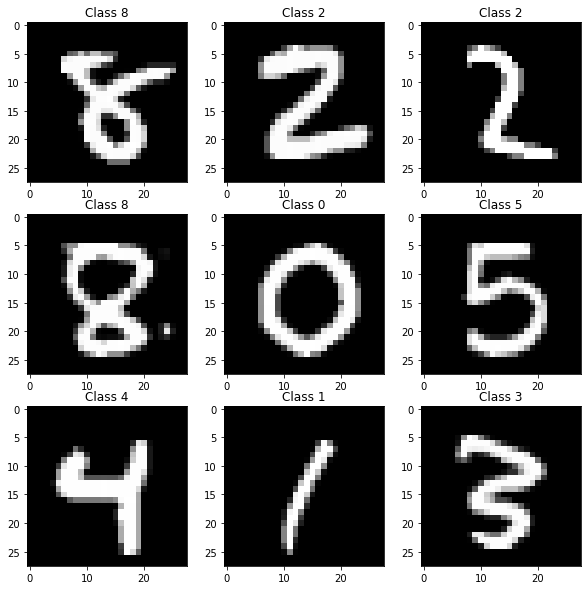

In [ ]:
plt.rcParams['figure.figsize'] = (10,10) # You can experiment with changing these size settings

for i in range(9):
    plt.subplot(3, 3, i+1) # Produce a 3x3 array of plots, one at a time
    j = np.random.choice(y_train.size) # Choose a training image at random
    plt.imshow(X_train[j], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[j]))

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train / 255.0
X_test = X_test / 255.0
print("Training array shape", X_train.shape)
print("Testing array shape", X_test.shape)

Training array shape (60000, 784)
Testing array shape (10000, 784)


##Step6. 

In [ ]:
my_range = np.arange(10)
num_categories = 10

np_utils.to_categorical(my_range, num_categories)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

One-hot encoding is a way of representing data in a binary string in which only a single part can be 1, while all others can be 0. This allows for a more dense representation of data.

In [ ]:
Y_train = np_utils.to_categorical(y_train, num_categories)
Y_test = np_utils.to_categorical(y_test, num_categories)

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/4
469/469 [==============================] - 8s 15ms/step - loss: 0.2506 - accuracy: 0.9242 - val_loss: 0.1104 - val_accuracy: 0.9667
Epoch 2/4
469/469 [==============================] - 7s 14ms/step - loss: 0.1026 - accuracy: 0.9680 - val_loss: 0.0770 - val_accuracy: 0.9756
Epoch 3/4
469/469 [==============================] - 7s 15ms/step - loss: 0.0716 - accuracy: 0.9769 - val_loss: 0.0707 - val_accuracy: 0.9763
Epoch 4/4
469/469 [==============================] - 7s 15ms/step - loss: 0.0559 - accuracy: 0.9818 - val_loss: 0.0669 - val_accuracy: 0.9783


In [ ]:
predicted_digits = np.argmax(model.predict(X_test), axis=1)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_digits == y_test)[0]
incorrect_indices = np.nonzero(predicted_digits != y_test)[0]

##Step 12.

In [ ]:
correct_indices.size

9783

In [ ]:
incorrect_indices.size

217

In [ ]:
9783/(9783 + 217)

0.9783

98 percent of the test data images were classified correctly. 

##Step 13.

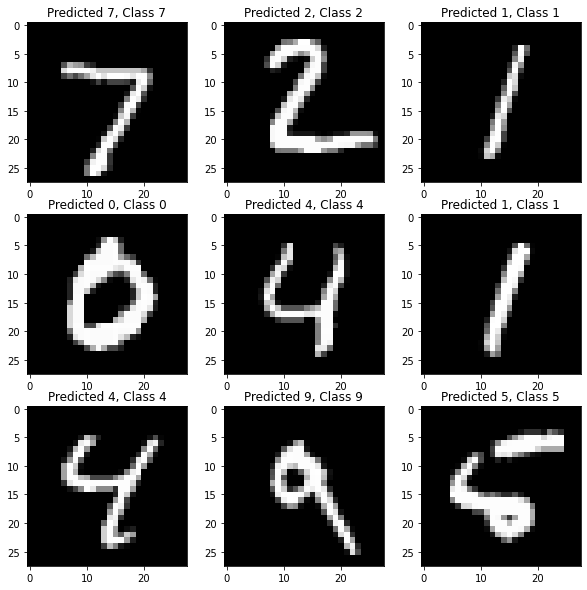

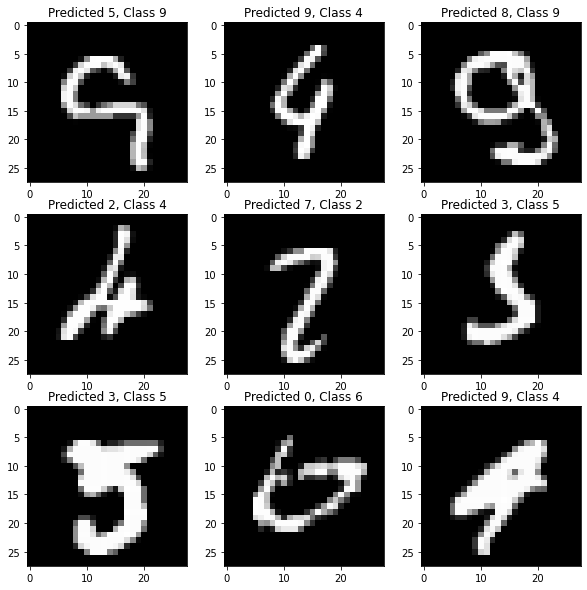

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_digits[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_digits[incorrect], y_test[incorrect]))

In [ ]:
X_Giovanni = np.loadtxt(urlopen(path_data + "X_Giovanni.csv"), dtype=np.uint8, skiprows=1, delimiter=',')
y_Giovanni = np.loadtxt(urlopen(path_data + "y_Giovanni.csv"), dtype=np.uint8, skiprows=1, delimiter=',')
X_Darius = np.loadtxt(urlopen(path_data + "X_Darius.csv"), dtype=np.uint8, skiprows=1, delimiter=',')
y_Darius = np.loadtxt(urlopen(path_data + "y_Darius.csv"), dtype=np.uint8, skiprows=1, delimiter=',')

# Scale the X images to be in the [0, 1] real number range instead of integers in the [0, 255] range
X_Giovanni = X_Giovanni / 255.0
X_Darius = X_Darius / 255.0

# Convert the y labels to one-hot format
Y_Giovanni = np_utils.to_categorical(y_Giovanni, num_categories)
Y_Darius = np_utils.to_categorical(y_Darius, num_categories)

##Step 15.

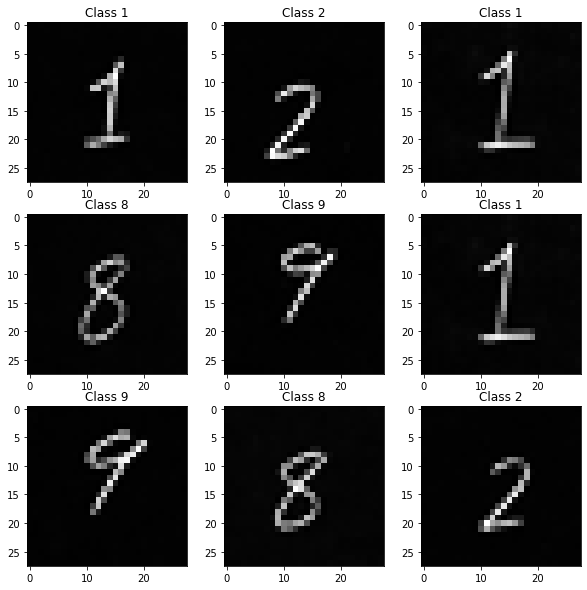

In [ ]:
plt.rcParams['figure.figsize'] = (10,10) # You can experiment with changing these size settings

for i in range(9):
    plt.subplot(3, 3, i+1) # Produce a 3x3 array of plots, one at a time
    j = np.random.choice(y_Giovanni.size) # Choose a training image at random
    plt.imshow(X_Giovanni[j].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_Giovanni[j]))

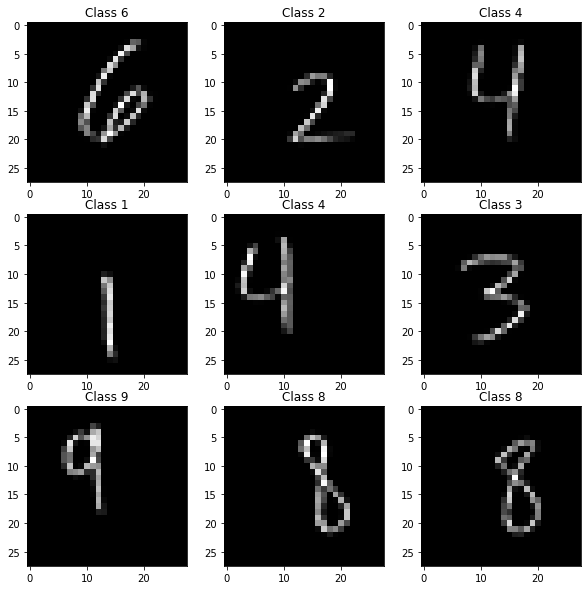

In [ ]:
plt.rcParams['figure.figsize'] = (10,10) # You can experiment with changing these size settings

for i in range(9):
    plt.subplot(3, 3, i+1) # Produce a 3x3 array of plots, one at a time
    j = np.random.choice(y_Darius.size) # Choose a training image at random
    plt.imshow(X_Darius[j].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_Darius[j]))

##Step 16.

####MNIST-trained neural net on Giovanni

In [ ]:
predicted_digits = np.argmax(model.predict(X_Giovanni), axis=1)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_digits == y_Giovanni)[0]
incorrect_indices = np.nonzero(predicted_digits != y_Giovanni)[0]

c_size = correct_indices.size
inc_size = incorrect_indices.size

c_size / (c_size + inc_size) *100

60.416666666666664

MNIST-trained neural net on Giovanni had 60 percent accuracy to be correctly classified.

####MNIST-trained neural net on Darius

In [ ]:
predicted_digits = np.argmax(model.predict(X_Darius), axis=1)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_digits == y_Darius)[0]
incorrect_indices = np.nonzero(predicted_digits != y_Darius)[0]

c_size = correct_indices.size
inc_size = incorrect_indices.size

c_size / (c_size + inc_size) *100

40.0

MNIST-trained neural net on Darius had 40 percent accuracy to be correctly classified.

####These two test sets do not perform as well as the MNIST test set.

###First nine correctly classified and incorrectly classified images for Giovanni

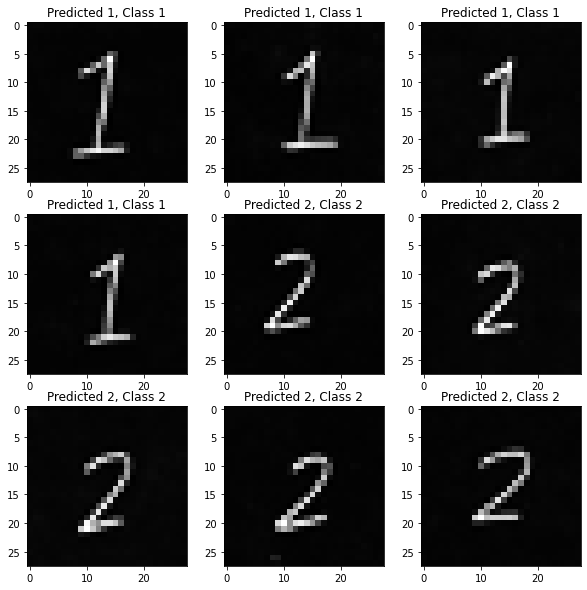

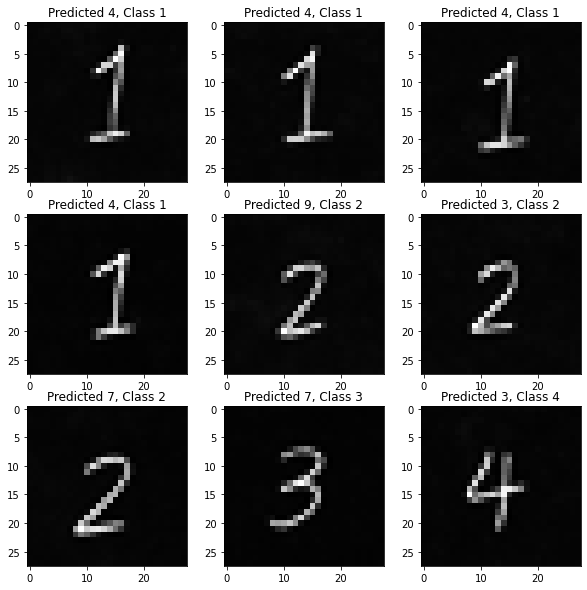

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_Giovanni[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_digits[correct], y_Giovanni[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_Giovanni[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_digits[incorrect], y_Giovanni[incorrect]))

###Step 17. 

In [ ]:
predicted_digits = np.argmax(model.predict(X_Giovanni), axis=1)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_digits == y_Darius)[0]
incorrect_indices = np.nonzero(predicted_digits != y_Darius)[0]

c_size = correct_indices.size
inc_size = incorrect_indices.size

c_size / (c_size + inc_size) *100

60.416666666666664

The prediction accuracy does not change from the neural net on Giovanni, but compared to the neural net on Darius, it has a better accuracy. 